#

After installing the prerequisite packages, to enable the dynamical content in this Jupyter notebook, please use configure your Jupyter client *in termonal* using 

```
jupyter nbextension enable --py --sys-prefix ipyleaflet
jupyter nbextension enable --py --sys-prefix widgetsnbextension
```

# Init

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

Palette = 'magma'
CycPalette = 'Greys'
DivPalette = 'RdYlGn'

FigSize = (20,12)
FigSizeMono = (20,6)
DPI = 72

In [84]:
import ipywidgets as widgets

from ipywidgets import HTML

# An Interactive Map

In [101]:
pi = np.pi


UserL = 2
MBoxL = 3


def SphericalDistance(PtA,PtB):
    
    PtALat = PtA[0] * pi / 180
    PtALon = PtA[1] * pi / 180
    
    PtBLat = PtB[0] * pi / 180
    PtBLon = PtB[1] * pi / 180
                
    rTerra = 6371009 # metres
                 
    return 2*rTerra*np.arcsin(np.sqrt(np.sin((PtALat-PtBLat)/2)**2+np.cos(PtALat)*np.cos(PtBLat)*np.sin((PtALon-PtBLon)/2)**2))
                 
                       

KeyLocation = (-42.40469961745638, 173.68168174089007)
center=(-42.404446107412646, 173.67427500707868)


from ipyleaflet import Map, basemaps, basemap_to_tiles, Marker, CircleMarker, Popup

m = Map(
    center=center,
    zoom=12,
    title = 'Group 11'
    )

m.layout.width = '75%'
m.layout.height = '500px'

m.layout.arrange= 'center'

marker = Marker(location=center, draggable=False)
m.add_layer(marker)


def handle_click(**kwargs):
    print(f"Hospital Location (Lat / Lon): {kwargs['coordinates']}")
    
marker.on_click(handle_click)


# User Clickable Interaction

Ci = 0
Clicked = False
def handle_map_interaction(**kwargs):
   # markerU = CircleMarker(location=(0,0), draggable=True, visible = False)
   # m.add_layer(markerU)
    #m.add_layer(markerU)
    global Clicked, Ci, marker
    #print(kwargs)
    Ci += 1
    if kwargs['type'] == 'click' and Clicked == False:
        Clicked = True
        
        NLoc =  kwargs['coordinates']
        
        markerU = CircleMarker(location=NLoc, draggable=True, color = '#454545')
        try:
            m.substitute_layer(m.layers[UserL],markerU)
            m.remove_layer(m.layers[MBoxL])
        except IndexError:
            m.add_layer(markerU)
            
        message = HTML()
        
        D = SphericalDistance(KeyLocation,NLoc)
        
        message.value = f'Risk index is .<br>Distance to Nearest Hospital: {D:.5g}m<br>This is about {D/1.2/60:.0f} minutes on foot.'
        
        popup = Popup(
        location=NLoc,
        close_button=False,
        auto_close=False,
        child = message,
        close_on_escape_key=True
        )
        m.add_layer(popup)

        # Popup associated to a layer
        markerU.popup = message

        

    if Ci%2 == 0:
        Clicked = False
        
m.on_interaction(handle_map_interaction)

# Popup with a given location on the map:


m

Map(center=[-42.404446107412646, 173.67427500707868], controls=(ZoomControl(options=['position', 'zoom_in_text…

# QGIS Street Map Graphication

In [133]:
import shapefile

st = shapefile.Reader("./Streets")

In [136]:
tL = st.shapes()

st.bbox

st.__geo_interface__['type']

'FeatureCollection'

In [135]:
len(st)

5252

In [191]:
PointSetX = []
PointSetY = []

In [171]:
Points = tL[1].points

Points

[(1847935.7839221805, 5787631.979023517),
 (1847939.920302255, 5787646.2169992225),
 (1847971.6466386802, 5787679.872639891),
 (1847981.0787927527, 5787693.806503863),
 (1847987.2954397565, 5787707.954734973),
 (1848008.9465206964, 5787770.335572135),
 (1848013.6625977326, 5787791.557918799),
 (1848013.233863457, 5787800.775705734),
 (1848004.4448107965, 5787814.280835431)]

[1820780.0286870003, 5772816.050310823, 1945945.7997040004, 5851644.005863661]


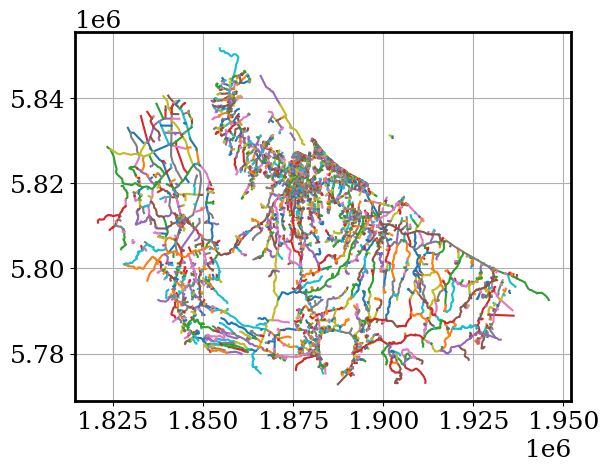

In [190]:

figlim = st.bbox

print(figlim)

fig = plt.figure()
ax = fig.add_subplot(111)

#plt.xlim(figlim[0],figlim[1])
#plt.ylim(figlim[2],figlim[3])

ax.set_aspect = 'equal'

ax.grid()

for i in range(len(st)):
    PAR = np.array(tL[i].points)

    PAR = PAR.reshape([-1,2])

    ax.plot(PAR[:,0],PAR[:,1])

# Graph Theory Considerations

We use only the intersection and termination nodes and construct a graph using the roads that join them. All other nodes are ignored and the distances are evaluated using d2 Norm.

In [192]:
import Graph
g = Graph()

ModuleNotFoundError: No module named 'Graph'